In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import chromedriver_binary


def open_browser():
    """
    Opens a new automated browser window with all tell-tales of automated browser disabled
    """
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")

    # remove all signs of this being an automated browser
    options.add_argument('--disable-blink-features=AutomationControlled')
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option('useAutomationExtension', False)

    # open the browser with the new options
    driver = webdriver.Chrome(options=options)
    return driver

In [2]:
# Open browser
driver = open_browser()
driver.get('https://zipfelzapf.ch/home')

In [3]:
def find_jobs(driver):
    """
    Finds all jobs loaded in the browser
    """
    jobs = driver.find_elements(By.CSS_SELECTOR, 'tbody tr')
    jobs.pop()
    return jobs

In [4]:
jobs = find_jobs(driver)

In [5]:
def get_job_info(job, driver):
    description = {}
    
    all_info = job.find_elements(By.CLASS_NAME,'bericht_eintrag_leiste')
    if not all_info:
        all_info = job.find_elements(By.CLASS_NAME,'bericht_eintrag_leiste_2')
        
    info_list = [info.text for info in all_info]

    loc_days = info_list.pop(1).split('\n')
    loc = loc_days[0]
    days = loc_days[1]
    info_list += [loc, days]
    name = ['Date', 'Position', 'Freq', 'Salary','StartDate', 'Location','Days']
    
    description = dict(zip(name, info_list))
    row = description.values()
    
    return description, row

def write_to_csv(data):
    header =['Date', 'Position', 'Freq', 'Salary','StartDate', 'Location','Days']
    with open('zipfel_zapf.csv', 'w',encoding='utf-8-sig') as f:
        # create the csv writer
        writer = csv.writer(f)

        # write a row to the csv file
        writer.writerow(header)
        writer.writerows(data)

In [6]:
import csv
data = []
for job in jobs:
    description, row = get_job_info(job, driver)
    if row:
        data.append(row)
    write_to_csv(data)

In [7]:
import pandas as pd
df = pd.read_csv('zipfel_zapf.csv')
df.head()

,Date,Position,Freq,Salary,StartDate,Location,Days
0,15.10.2023,Nanny,Regelmässig,Marktüblich,Februar/März 2024,Aarau - Aargau,1 Tag à ca 8-9 Stunden
1,07.10.2023,Nanny,Einmalig,20-25 CHF,09.00,Lenzerheide,1tag
2,06.10.2023,Nanny,Regelmässig,25-30 CHF,sofort,Schaffhausen - Schaffhausen,"Donnerstag, ~9 Stunden ab 7.45 Uhr"
3,06.10.2023,Nacht Nanny,Regelmässig,Marktüblich,Per sofort / baldmöglichst,Zurich - Zürich,2x Nächte / Woche
4,06.10.2023,Nanny,Regelmässig,Marktüblich,NaN,Flawil (SG),1 bis 2 Tage


In [8]:
# Salary Overview
salary_dict = {}
for s in df['Salary']:
    if s in salary_dict:
        salary_dict[s] += 1
    else:
        salary_dict[s] = 1
print(salary_dict)

{'Marktüblich': 45, '20-25 CHF': 10, '25-30 CHF': 3, '30-35 CHF': 4}


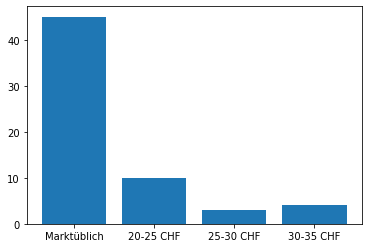

In [9]:
import numpy as np
import matplotlib.pyplot as plt
names = list(salary_dict.keys())
values = list(salary_dict.values())

plt.bar(range(len(salary_dict)), values, tick_label=names)
plt.show()

In [10]:
# Frequency Overview
freq_dict = {}
for f in df['Freq']:
    if f in freq_dict:
        freq_dict[f] += 1
    else:
        freq_dict[f] = 1
print(freq_dict)

{'Regelmässig': 51, 'Einmalig': 2, 'Mehrmalig': 9}
